# Time series classification with class imbalance

Class imbalance (i.e. the situation when there are many fewer train cases of 
one class than others) presents a specific challenge for classification, and a range 
of algorithms have been proposed to address this for general tabular problems. 
Imbalanced classification problems arise in many domains, such as fault detection or 
medical screening. `aeon` has a new module for dealing with class imbalance with time series 
classification. It contains algorithms based on traditional techniques, many of which 0

The `aeon` imbalance module  

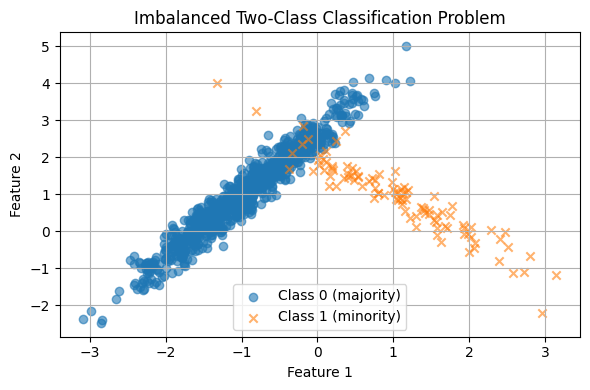

In [1]:
# Example of an imbalanced problem for tabular data with two attributes
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create imbalanced binary classification dataset
X, y = make_classification(
    n_samples=1000,  # total number of samples
    n_features=2,  # number of features
    n_redundant=0,  # no redundant features
    n_informative=2,  # both features are informative
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # imbalance ratio
    flip_y=0,  # no label noise
    random_state=42,
)

# Plot to visualise
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0 (majority)", alpha=0.6)
plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1 (minority)", alpha=0.6, marker="x"
)
plt.legend()
plt.title("Imbalanced Two-Class Classification Problem")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## Handling imbalanced train data

Generally, with class imbalance you can either try to rebalance the train data prior 
to calling fit, you can adjust the classification algorithm to internally manage 
imbalance or you can use probabilistic predictions in conjunction with a suitable 
cost function for type I and type II errors. Currently, aeon contains algorithms for 
rebalancing through over sampling the train data. 

### Under sampling the majority class

If you have a large train set size, you may want to rebalance by downsampling the 
majority class. The goal here is to remove series which are alike others in the train
 data that will not help make useful classification decisions,

### Over sampling the minority class

Resampling the training data is a popular approach to dealing with class imbalance. 

#### SMOTE and ADASYN

Perhaps the best known technique is the Synthetic Minority Over-sampling TEchnique 
(SMOTE). The SMOTE algorithm is summarised in Algorithm 1. 
<img src="img/smote.jpg" width="600" alt="SMOTE">

It creates synthetic cases of members of the minority class based on the nearest 
neighbours. SMOTE and related algorithms such as ADASYN are based on measuring the 
distance between cases using a standard metric such as Euclidean. However, there are 
a range of time series specific distances available in `aeon`, and our resampling 
algorithms can use them. ADASYN is an adaptation of SMOTE that looks only for 
neighbours of the negative class. 

Resamplers in `aeon` extend the `BaseCollectionTransformer` class. They are 
supervised transforms, so `fit` takes a collection of time series, `X` and the class 
labels `y`.


In [13]:
import numpy as np

from aeon.testing.data_generation import make_example_3d_numpy
from aeon.transformations.collection.imbalance import ADASYN, SMOTE

X, _ = make_example_3d_numpy(n_cases=100, n_timepoints=100)
y = np.zeros(100)
y[:6] = 1  # Imbalanced, only 6 positive out of 100 positive
smote = SMOTE()
ada = ADASYN()
X2, y2 = smote.fit_transform(X, y)
X3, y3 = ada.fit_transform(X, y)
print(y2)
print(X2.shape)
print(X3.shape)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(188, 1, 100)
(187, 1, 100)
